# Step2 演習02 線形回帰
---

Step2 演習02では教師あり学習の一種である連続値を返す線形回帰を実装します。NumPy配列を有効活用します。


**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 教師あり学習の一つの手法である連続値を予測する線形回帰モデルを実装する。
- NumPy配列を活用する。

## ライブラリのインポート

まずはじめに、利用するライブラリのインポートを行います。

- [NumPy](http://www.numpy.org) 数値計算を行うための基本パッケージの公式ドキュメント
- [matplotlib](http://matplotlib.org) グラフ描画ライブラリの基本パッケージの公式ドキュメント
- [matplotlib-Axes3D](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) matplotlibでの3Dグラフのをサポートする

ドキュメントには有用な情報が書き記されています。何か迷ったときには必ずドキュメントに戻ってくるようにしましょう。

次のセルをそのまま実行（"SHIFT" + "ENTER"）してください。コードが書いてあるセルは**上から順番に**順次実行してください。

** 注意： **初めてmatplotlibを使うユーザーは、フォント一覧のキャッシュが存在しないため、このセルの実行でWarningが出ます。もう一度実行すると、すでにキャッシュができているので、Warningなく走ります。

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn import datasets
import os
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

## 線形回帰に使うサンプルデータ
今回の演習では、事前に用意したデータセットを使って線形回帰の実装を行います。

下のセルを実行するとデータセットが読み込まれます。

一度生成したら同じものを毎回使えるように、データをCSVファイル(Comma-Separated Values コンマで区切られたデータ)で保存しておきます。
<br><br>
** Note： **新たなデータを使いたいときは、CSVファイルの名前を変えるか、コードを変えましょう。

In [8]:
if not os.path.isdir("./dataStep2"):
    os.makedirs("./dataStep2")

if os.path.isfile("./dataStep2/dataStep2_1.csv") == True:
    data = np.loadtxt("./dataStep2/dataStep2_1.csv", delimiter = ",")
    X = data[:,0][:,np.newaxis]
    y = data[:,1][:,np.newaxis]

else:
    X, y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, noise=30)
    np.savetxt("./dataStep2/dataStep2_1.csv", np.c_[X, y], delimiter=",")
    y = y[:,np.newaxis]

上のセルを実行したことによりデータセットを "data" に格納しました。下のセルを実行して、dataのshapeを確認しましょう。

In [9]:
data.shape

(100, 2)

(100,2)と表示されたはずです。では下のセルを実行してデータの中身を確認してみましょう。

In [10]:
data

array([[-1.25618162e+00, -8.44847627e+01],
       [ 2.92807477e-01,  3.63090594e+01],
       [-2.20728082e+00, -1.68159452e+02],
       [-1.72993700e-02,  4.43576702e+01],
       [ 1.48209916e+00,  7.12142752e+01],
       [ 1.27606822e+00,  8.13103959e+01],
       [-2.45915592e+00, -1.27197369e+02],
       [ 1.01698363e+00,  1.60988280e+01],
       [ 8.51699293e-01,  7.49492300e+01],
       [-6.69043871e-01, -5.20350902e+01],
       [ 3.60406066e-01, -5.57092178e+01],
       [ 2.37341861e-01,  3.08039234e+01],
       [-3.97998034e-01, -6.18545431e+01],
       [ 5.78590005e-02, -5.94925870e+01],
       [-1.90256472e+00, -1.13719547e+02],
       [ 6.64659079e-01,  2.48460620e+01],
       [-1.98924496e+00, -1.32371588e+02],
       [ 8.06054382e-01,  2.90130305e+01],
       [-1.01599449e+00, -7.17560315e+01],
       [ 9.45116743e-02, -1.48278208e+01],
       [ 9.78096541e-02,  5.24660756e+00],
       [ 3.58603554e-01,  3.90050151e+01],
       [-1.18372964e+00, -8.05859548e+01],
       [-1.

大量のデータが格納されているdataを表示すると全データセットが表示されてしまいます。

このような場合、部分的にdataの中身を確認する方法を知っていると便利です。下のセルを実行してみてください。

In [11]:
#dataに格納されたデータセットの最初から５行目および最初から２列目を出力
#"0:5"は「最初の行〜５行目まで」の範囲を指定、"0:2"は「最初の列〜2列目まで」の範囲を指定
data[0:5,0:2] 

array([[-1.25618162e+00, -8.44847627e+01],
       [ 2.92807477e-01,  3.63090594e+01],
       [-2.20728082e+00, -1.68159452e+02],
       [-1.72993700e-02,  4.43576702e+01],
       [ 1.48209916e+00,  7.12142752e+01]])

In [12]:
#dataに格納されたデータセットの最初から５行目および最初から２列目を出力
#範囲を指定する場合、行の場合も列の場合も、最初からの場合指定は不要、最後の場合も指定は不要
#したがって[:5,:]はdata[0:5,0:2] の省略形
#さらに下のコードは、[:5,:]の",:" を省略 
data[:5]

array([[-1.25618162e+00, -8.44847627e+01],
       [ 2.92807477e-01,  3.63090594e+01],
       [-2.20728082e+00, -1.68159452e+02],
       [-1.72993700e-02,  4.43576702e+01],
       [ 1.48209916e+00,  7.12142752e+01]])

今回使うデータセットは100行2列の行列がdataに格納されています。

Xにdataの左側のデータセットを格納し、yにdataの右側のデータセットを格納しています。

dataの中身を訓練データ $X$ と目標変数 $y$ にわけました。** $X$ **と ** $y$ ** のshapeと中身を確認しておきましょう。

In [13]:
X.shape

(100, 1)

In [14]:
X[:5]

array([[-1.25618162],
       [ 0.29280748],
       [-2.20728082],
       [-0.01729937],
       [ 1.48209916]])

In [15]:
y.shape

(100, 1)

In [16]:
y[:5]

array([[ -84.4847627 ],
       [  36.30905936],
       [-168.15945223],
       [  44.3576702 ],
       [  71.21427524]])

- ** X ** は訓練データ
- ** y ** は正解

m に訓練例の数を格納しておきます。今回は100個のデータセットになります。

In [17]:
m = y.size # 訓練例の個数

In [18]:
print("訓練例の数m：{}".format(m))

訓練例の数m：100


## データセットの可視化

可視化は機械学習の実装において大変重要な作業になります。開発を進める前にデータセットの性質を把握し、可視化する癖をつけておきましょう。

今回生成したデータセットの横軸は「街の人口の増減 [百人]」、縦軸は「税収の増減 [百万円]」とします。

**【課題５】** 可視化する関数plotData(X, y)を記述しましょう。

ヒント：`plt.scatter(X,y)`でその内容が散布図としてプロットされます。

** Note：**<br>
軸に名前をつけたり、描画する範囲を指定といった装飾を加えたい場合は、公式チュートリアルでさまざまな手法が紹介されているので試してみましょう。今回はとくに軸のラベル名と描画範囲の指定の方法について記述します。

参考：[matplotlib.pyplot 公式チュートリアル](http://matplotlib.org/api/pyplot_api.html)

* 軸に名前（ラベル）をつける
    * plt.xlabel("ここに横軸の名前")
    * plt.ylabel("ここに縦軸の名前")
* 描画範囲の指定
    * plt.xlim([Num, Num])
    * plt.xlim([Num, Num])

※"Num"に任意の値で範囲を指定

In [19]:
#Coursemale-02 Step2 QuestionNumber5 50e18cf72b791cae57115899f7102f81
def plotData(X, y):
###############ここを穴埋めしてください###############
    plt.xlim([-3, 3])
    plt.ylim([-300, 300])
    plt.scatter(X, y)
    plt.xlabel('街の人口の増加[百人]')
    plt.ylabel('税収の増減[百万円]')
    plt.draw()

######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [20]:
%%bash
./validation_client.py male-02 2 5 Step2_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



**答え**

今回の例での最もシンプルな可視化は、** plt.scatter(X,y) **のみでグラフを出力することができますが、機械学習では多くのデータを扱います。

いつどのデータを扱っているのかわからなくなることが頻繁に発生します。

データを可視化する際はグラフを読み間違えたりしないよう、軸に名前をつける(`xlabel`, `ylabel`)などの装飾をすることは習慣にしておきましょう。

多少の装飾を施した例が下のセルです。

In [21]:
def plotData(X, y):
    plt.xlim([-3,3])
    plt.ylim([-300,300])
    plt.scatter(X,y)
    plt.xlabel('街の人口の増減 [百人]')
    plt.ylabel('税収の増減 [百万円]')
    plt.draw()

いま実装した関数`plotData(X, y)`を実行すると、グラフが出力されます。

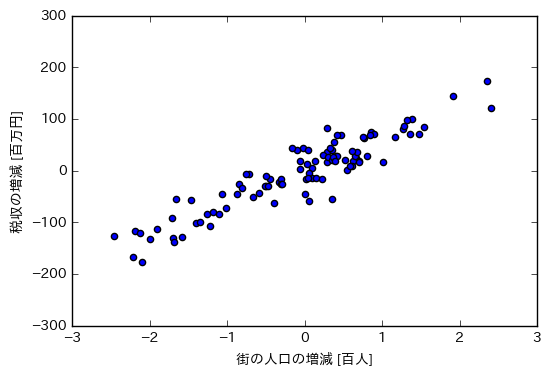

In [22]:
plotData(X, y)

## Step2 配列を使って線形回帰を実装してみよう

データの確認が終わったところで、これから連続値を返す線形回帰を実装します。

線形回帰の仮説は以下の通りでした：

$$h_{\boldsymbol{\theta}}(x^{(i)})=\theta_0+\theta_1x^{(i)}$$

Step2 演習01では、この仮説に現れる２つのパラメータ$\theta_0$と$\theta_1$をそれぞれ別々に用意していました($\theta_1$をa、$\theta_0$をbとしていました)。

ここではこの２つのパラメータを一つの配列にまとめ、演算する方法を学びます。この例ではパラメータが2つだけですが、線形回帰のパラメータの数は100にも1000もある可能性もあるので、パラメータを配列としてまとめて扱う方法（ベクトルや行列として扱う方法）は非常に強力で、この方法を学ぶと規模が大きな線形回帰問題にも楽に取り組めるようになります。

ここではパラメータが２つあるので、２つ値を持つ配列 thetaを定義しましょう。以下の例ではこの２つの値の初期値はそれぞれ、３と０となります。

In [23]:
theta = [3, 0]

配列 thetaの最初の値には theta[0] 、2目に値には　theta[1] としてアクセスできます。

In [24]:
# theta の１つ目の値
theta[0]

3

In [25]:
# theta の2つ目の値
theta[1]

0

In [26]:
# theta の１つ目の値を0に書き換える
theta[0] = 0

In [27]:
# theta の１つ目の値を確認
theta[0]

0

Python標準の配列ではなくNumPy配列を利用する場合、配列thetaは以下のように作ることができます。

In [28]:
theta1 = np.array([2, 3])

# または

theta2 = np.array([[5], [9]])

# theta1の要素を確認
print(theta1[0])
print(theta1[1])

# theta2の要素を確認
print(theta2[0])
print(theta2[1])

2
3
[5]
[9]


下記のコードは、Step2 演習01で実装した線形回帰のコードです。まず、これを実行して正しく動くことを確認しましょう。

62.00480345956564
0.02957986029492848


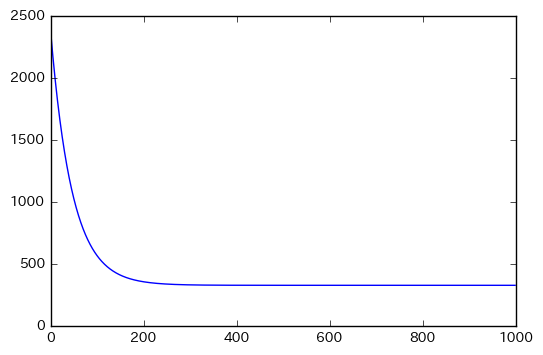

In [29]:
#Step2 演習01で実装した１変数の線形回帰のコード
m = X.size
cost = []

#学習率
alpha = 0.01

#パラメータの初期化
a = 0.
b = 0.

for i in range(1000):
    #仮説の計算
    h = a * X + b

    #目的関数（コスト関数）の値を記録
    cost.append(1 / (2*m) * np.sum((h - y)**2))
    
    #パラメータの更新(学習) 
    a = a - alpha/m * np.sum((h - y)*X)
    b = b - alpha/m * np.sum(h - y)

plt.plot(cost)
print(a)
print(b)

下記は、パラメータaをtheta[1]、パラメータbをtheta[0]で置き換えたコードです。これも問題なく実行できることを確認してみましょう。

[62.00480346]
[0.02957986]


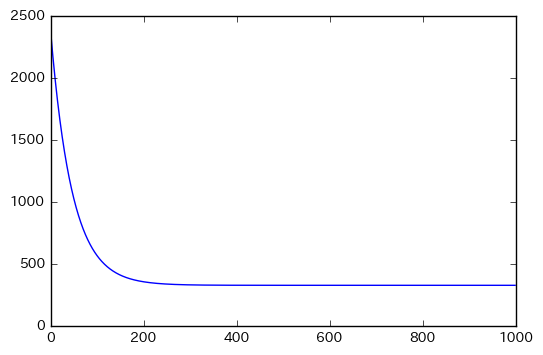

In [30]:
#Step2 演習01で実装した１変数の線形回帰のコード
#学習率
alpha = 0.01

#パラメータの初期化
theta = np.array([[0.], [0.]])# a = theta[1], b = theta[0]

m = X.size
cost = []

for i in range(1000):
    #仮説の計算
    h =  theta[0] + theta[1] * X

    #目的関数（コスト関数）
    cost.append(1 / (2* m) * np.sum((h-y)**2))
    
    #学習（パラメータの更新）
    theta[0] = theta[0] - alpha / m * np.sum(h-y)
    theta[1] = theta[1] - alpha / m * np.sum((h-y)*X)
    
plt.plot(cost)
print(theta[1])
print(theta[0])

仮説hをプロットして、学習結果を視覚的に確認してみましょう。

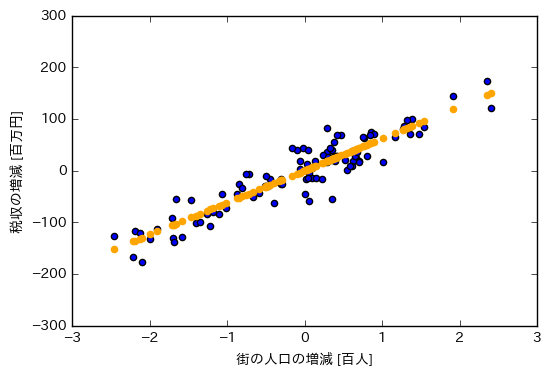

In [31]:
plt.xlim([-3,3])
plt.ylim([-300,300])
plt.scatter(X, y)
plt.scatter(X, h, color='orange')
plt.xlabel('街の人口の増減 [百人]')
plt.ylabel('税収の増減 [百万円]')
plt.show()

上記のように配列を使えば、aとbというパラメータを個別に用意しなくても、パラメータを配列でひとまとめにして線形回帰問題を解けることが分かりました。

配列を使うメリットはそれだけではありません。仮説の計算やパラメータの更新式を非常に簡潔に記述できるのです。その方法を以下で学びましょう。

## 目的関数
線形回帰の目的関数$J(\theta_0, \theta_1)$を、改めて以下に示します。
$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})^2$$
<br><br>
仮説$h_{\boldsymbol{\theta}}(x^{(i)})$は、
$$h_{\boldsymbol{\theta}}(x^{(i)})=\theta_0+\theta_1x^{(i)}$$
<br><br>であるとします。ここで、$x^{(i)}$はデータセットXのi番目の要素です。<br><br>

ここから少し数学的な処理が続きますが、下記の内容をすぐに理解できなくてもXwithBiasの実装をさえ理解できれば大丈夫です。

<br>
仮説の式を良く見てみると、１行２列の行列$\left(
    \begin{array}{ccc}
      1\hspace{10px}x^{(i)}
    \end{array}
  \right) $と２行１列の行列$\left(
    \begin{array}{ccc}
      \theta_0 \\
      \theta_1 
    \end{array}
  \right)$の行列積として下記のように記述できることが分かります。

$$
\begin{equation}
    h_{\boldsymbol{\theta}}(x^{(i)})
= \left(
    \begin{array}{ccc}
      1\hspace{10px}x^{(i)}
    \end{array}
  \right) \cdot \left(
    \begin{array}{ccc}
      \theta_0 \\
      \theta_1 
    \end{array}
  \right)
  \end{equation}
$$



$$
= 
    \begin{array}{ccc}
      XwithBias^{(i)}
    \end{array}
  \cdot \left(
    \begin{array}{ccc}
      \theta_0 \\
      \theta_1 
    \end{array}
  \right)
$$

ただし、
$$XwithBias^{(i)}=(1\hspace{10px}x^{(i)})$$

したがって、`X`の左側に値がすべて１の列を付け足した行列** XwithBias **（下記）を用いれば、

$$\begin{equation}
XwithBias=
\begin{pmatrix}
1\hspace{10px}x^{(1)} \\
1\hspace{10px}x^{(2)}\\
\vdots \\
1\hspace{10px}x^{(i)} 
\end{pmatrix}
\end{equation}$$

下記のように、行列** XwithBias **と行列** theta **とかけ算を行うことで$\theta_0+\theta_1x^{(i)}$をまとめて一度に計算できます。

$$\begin{equation}
      XwithBias
 \cdot \left(
    \begin{array}{ccc}
      \theta_0 \\
      \theta_1 
    \end{array}
  \right)=
\begin{pmatrix}
\theta_{0}+\theta_{1}x^{(1)} \\
\theta_{0}+\theta_{1}x^{(2)} \\
\vdots \\
\theta_{0}+\theta_{1}x^{(i)} \\
\end{pmatrix}
\end{equation}$$

このような行列** XwithBias **を作成するコードは、下記のように**関数np.ones()**と**関数np.c_()**を用いて実装できます。

 * np.ones([m,1])でshape(100, 1)の配列を生成 (mは訓練例の個数)
 * np.c_でnp.ones()で生成した1とXを連結、** XwithBias **の生成

In [32]:
# Xの1列目にズラッと1を並べる。np.c_[]はcolumn方向に連結
XwithBias = np.c_[np.ones([m,1]), X] 

下のセルを実行して`XwithBias`の最初の５行を出力し、Xの左側に1が追加された行列になっていることを確認してみましょう。

In [33]:
XwithBias[:5]

array([[ 1.        , -1.25618162],
       [ 1.        ,  0.29280748],
       [ 1.        , -2.20728082],
       [ 1.        , -0.01729937],
       [ 1.        ,  1.48209916]])

### パラメータの初期化

パラメータ$\theta_0$と$ \theta_1$を配列で準備します。今回はパラメータ$\theta_0$,$\theta_1$共に0で初期化します。

In [34]:
theta = np.array([[0.], [0.]]) 

これは以下のようにも記述しても同じです。

In [35]:
theta = np.zeros([2,1]) # フィッティングパラメータをゼロに初期化 ２次元配列であることに注意しましょう

パラメータが準備できたので、目的関数の$J(\theta_0, \theta_1)$を計算するコードを実装してみましょう。

**【課題６】** [目的関数](#目的関数)の値を計算する関数`computeCost(XwithBias, y, theta)`を実装しましょう。

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})^2$$
<br>
$$h_{\boldsymbol{\theta}}(x^{(i)})=\theta_0+\theta_1x^{(i)}$$
<br>
$$\begin{equation}
\left(
    \begin{array}{ccc}
\theta_{0}+\theta_{1}x^{(1)} \\
\theta_{0}+\theta_{1}x^{(2)} \\
\vdots \\
\theta_{0}+\theta_{1}x^{(m)} \\
    \end{array}
  \right)=
\left(
    \begin{array}{ccc}
1\hspace{10px}x^{(1)} \\
1\hspace{10px}x^{(2)}\\
\vdots \\
1\hspace{10px}x^{(m)} 
    \end{array}
  \right) 
\cdot \left(
    \begin{array}{ccc}
      \theta_0 \\
      \theta_1 
    \end{array}
  \right)
\end{equation}$$

$$=XwithBias\cdot{theta}$$

よって

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^{m}_{i=1}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})^2$$

$$=\frac{1}{2m}\left\{
(h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)})^2
+
(h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)})^2
+\cdots+
(h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)})^2
\right\}$$

$$
=\frac{1}{2m}(XwithBias\cdot{theta}-y)^{\top}\cdot{(XwithBias\cdot{theta}-y)}
$$

$$
=\frac{1}{2m}\left\{(XwithBias\cdot{theta}-y)\hspace{5px}\bf{の各要素の二乗の和} \right\} 
$$


** Note： **<br>
- $h_{\boldsymbol{\theta}}(x^{(i)})$ 
の計算では、**XwithBias** と **theta** の行列演算を行う必要があります。行列演算は「np.dot()」を用いることで実行できます。

In [36]:
#Coursemale-02 Step2 QuestionNumber6 99319cfdbd7466dbbb16994d953f02b6
def computeCost(XwithBias, y, theta):
    m = y.size
###############ここを穴埋めしてください###############
    J = ((np.dot(XwithBias, theta) - y)**2).sum() / (2*m)
######################################################
    return J

左上の**保存マークをクリックした後**、次のセルを"SHIFT"+"ENTER"で実行して採点します。

In [37]:
%%bash
./validation_client.py male-02 2 6 Step2_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



In [38]:
J_initial = computeCost(XwithBias, y, theta)
print("初期のthetaを目的関数へ代入した値は%f"% J_initial)

初期のthetaを目的関数へ代入した値は2387.911659


**【余談】Python3.5で新たに登場したdot積の書き方**

Python3.5以降では、dot積（ここでは2次元配列同士なので普通の行列の積）を`@`で書くこともできるようになりました。これを用いると

In [39]:
temp_a = np.array([1,2])
temp_b = np.array([3,4])

In [40]:
temp_a.dot(temp_b)

11

といったように`.dot()`を使っていたところを

In [41]:
temp_a @ temp_b

11

のように`@`をつかって書けます。

Pythonバージョン依存性が強いコードになってしまいますが、見やすさも大切なので、Python3.5以降でしか使わないことが分かっているコードならば上のような書き方を使ってもよいでしょう。

## パラメータの更新（学習）の式を実装する
### 最急降下法
最急降下法は、次の操作を繰り返してパラメータ$\theta$（ここでは$\theta_0、 \theta_1$）を更新（学習）します。
$$\theta_0 := \theta_0 - \alpha\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1)$$
$$\theta_1 := \theta_1 - \alpha\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1)$$
<br>
この式に線形回帰の目的関数$J(\theta_0, \theta_1)$ を代入し、微分をしてまとめると次のようになります。
$$\begin{align}\theta_0 &:= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) \\
\theta_1 &:= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})x^{(i)}\end{align}$$

これを計算するコードを書けば線形回帰を実装できます。$\theta_{0},\theta_{1},$のシグマの部分を展開してまとめるてみると、行列計算を使うと非常に簡単に計算できることが分かります。

*** $\theta_{0}$のシグマの部分  : ***

$$\displaystyle\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) $$

$$=h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)}+h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)}+\cdots+h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)}$$

$$=\theta_{0}+\theta_{1}x^{(1)}-y^{(1)}+\theta_{0}+\theta_{1}x^{(2)}-y^{(2)}+\cdots+\theta_{0}+\theta_{1}x^{(m)}-y^{(m)}$$

$$\begin{equation}
= \left(
    \begin{array}{ccc}
1\hspace{20px}x^{(1)}\\
1\hspace{20px}x^{(2)}\\
1\hspace{20px}x^{(3)}\\
\vdots \\
1\hspace{20px}x^{(m)}
    \end{array}
  \right) 
\left(
    \begin{array}{ccc}
\theta_{0}\\
\theta_{1}
    \end{array}
  \right) 
- \left(
    \begin{array}{ccc}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
\vdots \\
y^{(m)}\\
    \end{array}
  \right)
\end{equation}$$

$$=XwithBias\cdot{theta}-y \hspace{20px}\bf{の各要素の和}$$

*** $\theta_{1}$のシグマの部分 : ***

$$\displaystyle\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})\cdot{x^{(i)}}$$

$$=(h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)})\cdot{x^{(1)}}+(h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)})\cdot{x^{(2)}}+\cdots+(h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)})\cdot{x^{(m)}}$$

$$
\begin{equation}
= \left(
    \begin{array}{ccc}
h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)}\hspace{20px}h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)}\hspace{15px}\cdots\hspace{20px}{h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)}}
    \end{array}
  \right) \cdot \left(
    \begin{array}{ccc}
      x^{(1)} \\
      x^{(2)} \\
      \vdots \\
      x^{(m)} 
    \end{array}
  \right)
  \end{equation}
$$

$$=(XwithBias\cdot{theta}-y)^\top\cdot{x}$$

したがって、最急降下法を用いたパラメータの更新式 $(\theta_0, \theta_1)$ を各パラメータに対して記述すると次のセルのように記述できます。

In [42]:
# 学習率
alpha = 0.01

theta[0] = theta[0] - (alpha / m)*(XwithBias.dot(theta) - y).sum()
theta[1] = theta[1] - (alpha / m)*(XwithBias.dot(theta) - y).T.dot(X)

In [43]:
print(theta[0])
print(theta[1])

[-0.04384583]
[0.66320889]


**【課題７】** 最急降下法を用いたパラメータの更新式 theta を実装し、その結果（theta と J_history）を返す関数を実装してください。以下に、その一部がすでに書き込まれています。

** ヒント：**

$\theta=\left(
    \begin{array}{ccc}
\theta_{0}\\
\theta_{1}
    \end{array}
  \right) $とすると最急降下法の式は行列を用いて以下のように記述できます。このように、パラメータの更新式は行列をうまく利用すると１行で実装することもできます。

  
  $$\theta:=\theta-\alpha\frac{1}{m}  \left(
    \begin{array}{ccc}
      \displaystyle\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) \\
      \displaystyle\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})\cdot{x^{(i)}}
    \end{array}
  \right)$$
  
  $$=\theta-\alpha\frac{1}{m}\cdot{XwithBias^{\top}}\cdot(XwithBias\cdot{theta}-y)$$
  
  なぜなら

$$
  \left(
    \begin{array}{ccc}
      \displaystyle\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}) \\
      \displaystyle\sum_{i=1}^{m}(h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)})\cdot{x^{(i)}}
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)}+h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)}+\dots +h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)} \\
(h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)})\cdot{x^{(1)}}+(h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)})\cdot{x^{(2)}}+\dots+(h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)})\cdot{x^{(m)}}
    \end{array}
  \right)
$$


$$\begin{equation}
=
\left(
    \begin{array}{ccc}
1\hspace{20px}1\hspace{20px}1\hspace{20px}\cdots\hspace{20px}1\\
x^{(1)}\hspace{10px}x^{(2)}\hspace{10px}x^{(3)}\hspace{10px}\cdots\hspace{10px}x^{(m)}
    \end{array}
  \right) 
\cdot \left(
    \begin{array}{ccc}
h_{\boldsymbol{\theta}}(x^{(1)})-y^{(1)}\\
h_{\boldsymbol{\theta}}(x^{(2)})-y^{(2)}\\
h_{\boldsymbol{\theta}}(x^{(3)})-y^{(3)}\\
\vdots \\
h_{\boldsymbol{\theta}}(x^{(m)})-y^{(m)}
    \end{array}
  \right)
\end{equation}$$

$$\begin{equation}
= XwithBias^{\top}\cdot
\left\{\left(
    \begin{array}{ccc}
1\hspace{20px}x^{(1)}\\
1\hspace{20px}x^{(2)}\\
1\hspace{20px}x^{(3)}\\
\vdots \\
1\hspace{20px}x^{(m)}
    \end{array}
  \right) 
\left(
    \begin{array}{ccc}
\theta_{0}\\
\theta_{1}
    \end{array}
  \right) 
- \left(
    \begin{array}{ccc}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
\vdots \\
y^{(m)}\\
    \end{array}
  \right)\right\}
\end{equation}$$

$$
=XwithBias^{\top}\cdot{(XwithBias\cdot{theta}-y)}
$$


In [44]:
#Coursemale-02 Step2 QuestionNumber7 ffd991b4a2db8bd21a888ed5cb8083a3
def gradientDescent(XwithBias, y, theta, alpha, iterations):
    m = y.size
    J_history = np.empty([iterations, 1])
    #np.emptyは領域の確保だけ行う。初期化していないため中に何が入っているかは分からないので、必ず何かを代入して用いる
    
    for iter in range(iterations):
###############ここを穴埋めしてください###############
        theta = theta - (alpha / m) * XwithBias.T.dot(np.dot(XwithBias, theta) - y)
######################################################
        J_history[iter] = computeCost(XwithBias, y, theta)

    return (theta, J_history)

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [45]:
%%bash
./validation_client.py male-02 2 7 Step2_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



In [46]:
iterations = 1500
theta, J_history = gradientDescent(XwithBias, y, theta, alpha, iterations)

# 実行結果（θの値）を表示
print("最急降下法で導出されたθ0: %f,"% theta[0]) 
print("最急降下法で導出されたθ1: %f,"% theta[1]) 

最急降下法で導出されたθ0: 0.031071,
最急降下法で導出されたθ1: 62.006576,


**【注】`%f`というのは小数を表します。**

In [47]:
a = 123.4567
print("%f"% a) # 小数
print("%.2f"% a) # %.2fで小数点以下2桁まで表示することを表します
print("%d"% a) # %dは整数を表します

123.456700
123.46
123


## 目的関数 $ J(\theta_0, \theta_1)  $ が最適化されていく様子を見る
最急降下法の繰り返しによって目的関数$J(\theta_1, \theta_2)$が最小化（最適化）されていく様子をプロットしましょう。

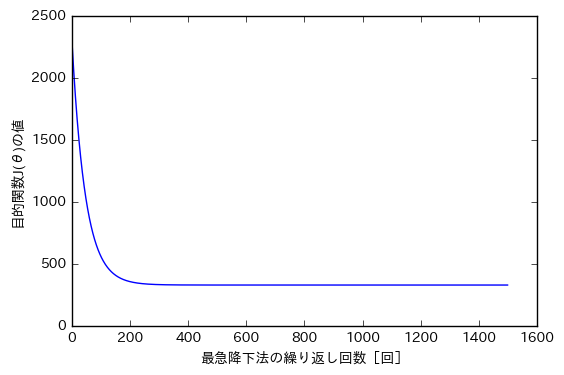

In [48]:
plt.plot(range(J_history.shape[0]), J_history)
plt.xlabel(u'最急降下法の繰り返し回数［回］')
plt.ylabel(u'目的関数J(θ)の値')
plt.show()

今回は200回程度で収束していることが分かります。

発展：学習率alphaを少しずつ大きくして、徐々に収束が速くなっていくことを確認しましょう。（`theta`を毎回初期化することを忘れないでください。）

また、ある程度大きくすると挙動がおかしくなることを確認しましょう。

## 結果の表示

最急降下法によって得られた結果を、グラフにプロットします。

In [49]:
def plotDataWithLine(X, y, theta):
    #課題5で実装してもらった関数です
    plotData(X, y)
    #plt.scatter(X,y)
    #このセル内で直前にプロットしたものに上書きしていきます
    plt.hold(True)
    
    #得られたthetaをもとにグラフの画面の端と端をプロットしてその間に直線で引くことで、回帰直線を掃引します。
    plt.plot([-3, 3], [(-3)*theta[1,0]+theta[0,0], 3*theta[1,0]+theta[0,0]]) 
    
    #念のため、グラフの端をもう一度指定しておきます。
    plt.xlim([-3,3])
    plt.ylim([-300,300])
    
    #凡例を入れます。
    plt.legend((u'線形回帰',u'訓練データ'))
    
    plt.show()

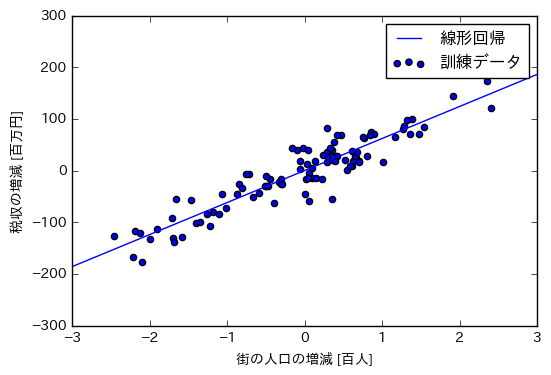

In [50]:
plotDataWithLine(X, y, theta)

## 予測
この結果を基に、人口の増減が+250人の時、税収の増減がどんな値になるか予測しましょう。

In [51]:
predict1 = np.array([1, 2.5]).dot(theta)
print("人口の増減が+250人の時、予測される税収の増減は %d"% predict1[0], "百万円")

人口の増減が+250人の時、予測される税収の増減は 155 百万円


**【課題８】** 人口の増減が $x$ 人のとき、予測される税収の増減がどんな値になるか予測する predict_y() 関数を実装しましょう。
<br>
<br>
** ヒント： **<br>
学習済みのパラメータ$\theta$を使って予測の式を実装します。
$$h_{\boldsymbol{\theta}}(x)=\theta_0+\theta_1x$$

predict_y() の引数 $x$ を渡すことで、人口の増減自由に表現できるようにします。

In [62]:
#Coursemale-02 Step2 QuestionNumber8 0ee17b9890430ecaa0500784caeab291
def predict_y(x, theta):
###############ここを穴埋めしてください###############
    predict = np.array([1, x]).dot(theta)
    return predict
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [63]:
%%bash
./validation_client.py male-02 2 8 Step2_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



In [64]:
predict2 = predict_y(-70, theta)
print("人口が-7000人の時、予測される税収の増減は %d"% predict2[0], "百万円")

人口が-7000人の時、予測される税収の増減は -4340 百万円


## $J(\theta_0, \theta_1)$の可視化

目的関数$J(\boldsymbol{\theta})$のグラフを見ながら谷へ落ちていく様子を見てみたい。そう考えるのは自然なことだと思います。

では実際に目的関数$J(\boldsymbol{\theta})$をプロットしてみましょう。やや複雑なコードなので、流し読みで構いません。そのまま実行しましょう。

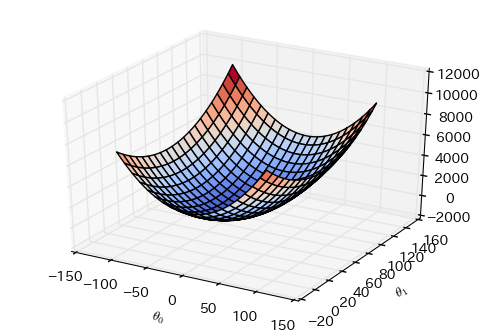

In [65]:
#%matplotlib notebook
# Jを計算する範囲を指定
theta0_vals = np.linspace(-100, 100, 100)
theta1_vals = np.linspace(-10, 150, 100)

# J_valsを初期化
J_vals = np.empty([theta0_vals.size, theta1_vals.size])

# J_valsを片っ端から計算
for i in range(0, theta0_vals.size):
    for j in range(0, theta1_vals.size):
        thetaForJvalCal = np.array([theta0_vals[i], theta1_vals[j]])[:,np.newaxis] #注：縦ベクトルに
        J_vals[i, j] = computeCost(XwithBias, y, thetaForJvalCal)

# 可視化
fig = plt.figure()
ax = fig.gca(projection='3d')
theta0_vals_plot, theta1_vals_plot = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(theta0_vals_plot, theta1_vals_plot, J_vals.T, rstride=5, cstride=5, cmap=cm.coolwarm)
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_zlabel('J')

ax.scatter(theta[0, 0], theta[1, 0], J_history[1499], c="red")

plt.show()

等高線で書き表すと次のようになります。

/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/opt/conda/lib/python3.5/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


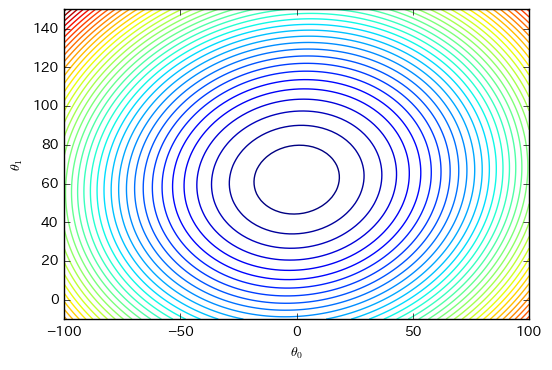

In [66]:
plt.contour(theta0_vals_plot, theta1_vals_plot, J_vals.T, 40)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.show()

今回は、パラメータ（ウェイト）$\boldsymbol{\theta}$が２次元であったため、3Dプロットや等高線を使って表してみることができました。

しかし、実際の場面では多次元である事が多いですし、グラフをプロットするということはプロットしたい領域の各点に関して予め$J(\boldsymbol{\theta})$を計算しておかねばならないということです。膨大な計算量になってしまうことが想像できると思います。

<br>
以上で、線形回帰を自力で実装することができました。書いたコードはストックし使い回すようにしましょう。

今後は、他の用途にも使い回せるようにコードを書くと、実践の場面で開発するときに楽になってきます。